# Visualización

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../Data/netflix_clean.csv") 
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce') # Hay que volve a cambiar el tipo de dato de date_added a datetime
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Desconocido,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Desconocido,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Desconocido,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Desconocido,Desconocido,Desconocido,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Desconocido,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


Para una primera visualización e introducirnos en el contenido, vamos a ver un histograma típico donde observaremos, en función del año, la cantidad de contenido producido por Netflix.

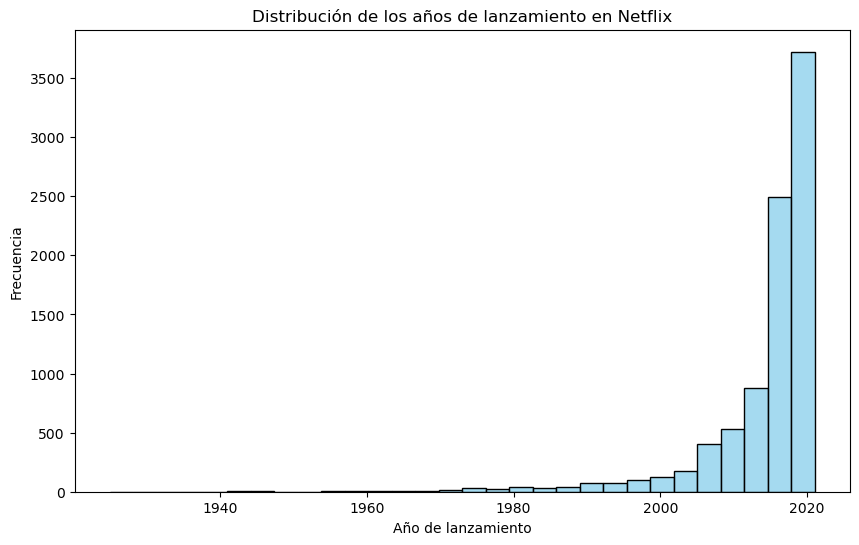

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='release_year', bins=30, color='skyblue')
plt.title('Distribución de los años de lanzamiento en Netflix')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Frecuencia')
plt.show()

La mayoría del contenido disponible en Netflix corresponde a producciones recientes, especialmente entre 2010 y 2021. El catálogo incluye pocas obras anteriores a 1980, lo que refleja una orientación hacia contenido moderno. Una técnica utilizada por Netflix es concentrarse en el contenido contemporáneo, estrategia que los llevó a la fama actual.

En segundo lugar, mediante otro countplot vamos a ver las categorías más típicas de las películas o TV shows del estudio.

C:\Users\jurre\AppData\Local\Temp\ipykernel_7172\586021911.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='viridis' )


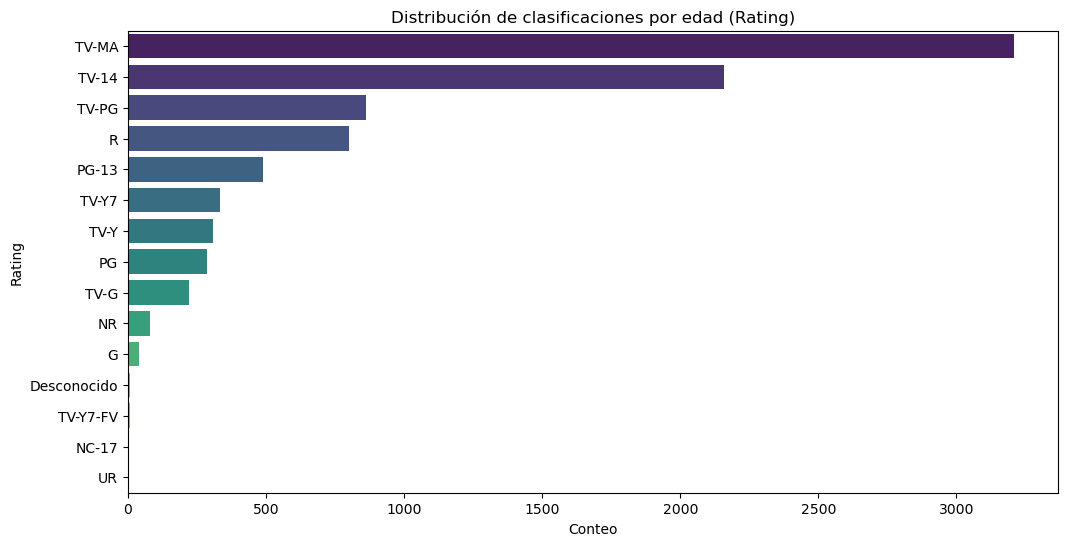

In [9]:


plt.figure(figsize=(12,6))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='viridis' )
plt.title('Distribución de clasificaciones por edad (Rating)')
plt.xlabel('Conteo')
plt.ylabel('Rating')
plt.show()



Las clasificaciones más frecuentes son TV-MA y TV-14, lo que indica que gran parte del contenido está dirigido a un público adolescente y adulto. Las clasificaciones infantiles, como TV-Y o TV-Y7, tienen una presencia menor.

También cabe destacar la categoría Desconocido, formada por los valores NaN recogidos en la tabla, constituye un porcentaje pequeño del total de inputs.

Mediante un gráfico de barras vamos a visualizar los países con mayor cantidad de producciones en Netflix, divididos tanto en Movies como en TV Shows.

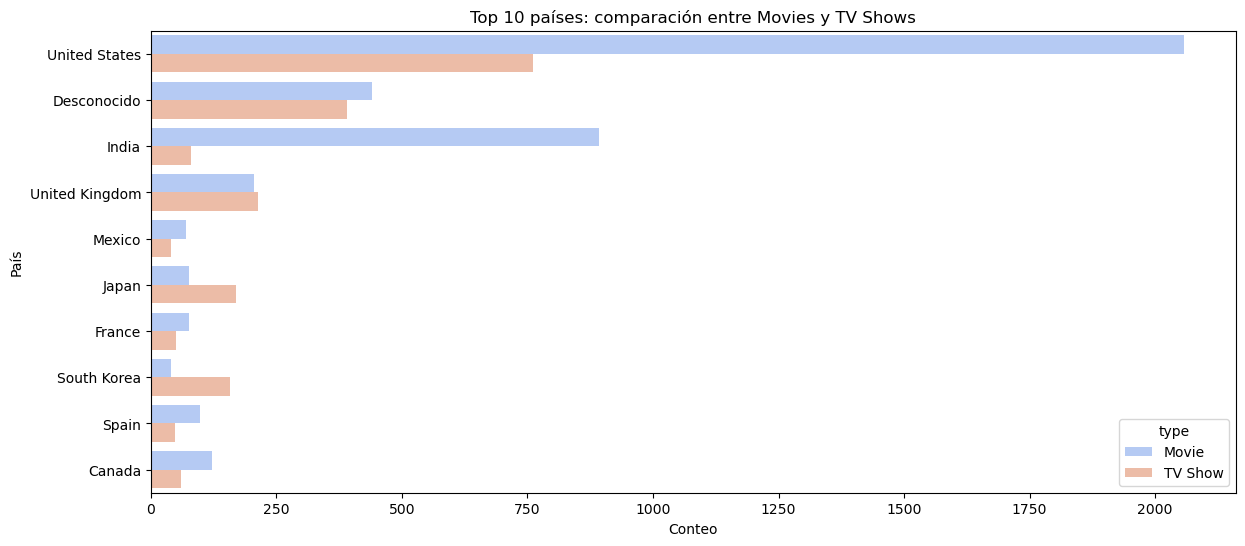

In [10]:
top_countries = df['country'].value_counts().head(10).index
df_top = df[df['country'].isin(top_countries)]

plt.figure(figsize=(14,6))
sns.countplot(data=df_top, y='country', hue='type', palette='coolwarm')

plt.title('Top 10 países: comparación entre Movies y TV Shows')
plt.xlabel('Conteo')
plt.ylabel('País')
plt.show()

Como era de esperar, Estados Unidos lidera en número de títulos tanto en Movies como en TV Shows. Sin embargo, es importante destacar que existe una cantidad considerable de valores provenientes de registros con información incompleta. Esta falta de datos puede afectar la interpretación, ya que:

- Reduce la precisión del ranking real de países.

- Puede generar una sobrerrepresentación o subrepresentación de ciertos países.

- Hace que la comparación no sea completamente fiable.

Se ha decidido hacer esta gráfica precisamente para mostrar este hecho y resaltar la importancia de los NaN en esta categoría.

Finalmente, vamos a estudiar la evolución por año (release_year) de las películas y series.

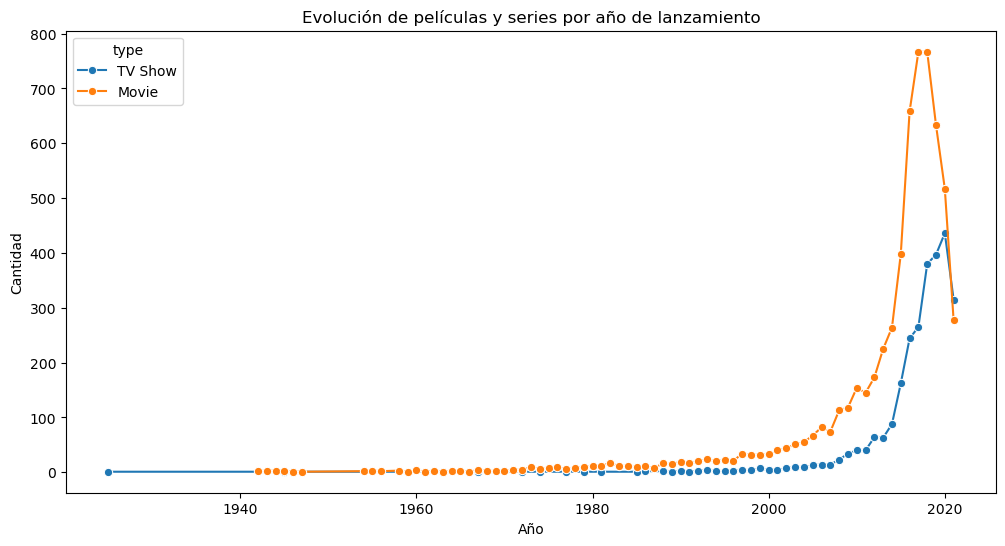

In [11]:
df_year_type = df.groupby(['release_year', 'type']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.lineplot(data=df_year_type, x='release_year', y='count', hue='type', marker='o')
plt.title('Evolución de películas y series por año de lanzamiento')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.show()

Se observa un gran pico y un aumento en la creación o introducción de contenido audiovisual alrededor del año 2020. El descenso que aparece en 2021 se debe a que la información del dataset no incluye los datos completos de ese año; no obstante, se podría estimar y, mediante técnicas de regresión, predecir valores para los años posteriores a 2020.

Cabe destacar que, con la información recopilada en torno a 2021 (aprox. 2020–2021), se aprecia que las series (TV shows) superan a las películas. Hoy en día (2025) esto no nos sorprende tanto, pero en su momento pudo ser un factor determinante para un director a la hora de decidir en qué tipo de contenido centrarse, anticipando un posible auge de las series y de su consumo.

A lo largo de este proyecto se ha realizado un análisis exploratorio completo del catálogo de Netflix, comenzando por una revisión detallada de la estructura del dataset y continuando con un proceso de limpieza orientado a garantizar la coherencia y la calidad de los datos. Se corrigieron inconsistencias entre columnas, se detectaron y reubicaron valores mal registrados y se trataron adecuadamente los valores nulos.

Posteriormente, mediante diversas visualizaciones, se identificaron patrones relevantes en el catálogo, como la predominancia de contenido reciente, la mayor presencia de películas frente a series (dato que quizá, con datasets más actualizados, no sería así) y la distribución de clasificaciones por edad.

En conjunto, este estudio proporciona una visión clara y estructurada del dataset, destacando tanto sus características principales como las tendencias más relevantes. El proceso seguido demuestra la importancia de una correcta preparación de los datos antes de cualquier análisis y cómo las visualizaciones adecuadas pueden revelar información significativa de forma intuitiva y accesible.